In [18]:
#Представление данных
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv( "METAB_training_disguised.csv")
print(data.head())

  MOLECULE    Act  D_36  D_37  D_38  D_39  D_41  D_42  D_43  D_44  ...  \
0   M_5058  70.00     0     0     0     0     0     0     0     0  ...   
1   M_6406  74.68     0     0     0     0     0     0     0     0  ...   
2  M_12634   2.00     0     0     0     0     0     0     0     0  ...   
3  M_17594   0.00     0     0     0     0     0     0     0     0  ...   
4  M_17627  73.00     0     0     0     0     0     0     0     0  ...   

   D_10736  D_10737  D_10738  D_10740  D_10741  D_10743  D_10744  D_10745  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   D_10746  D_10763  
0        0        0  
1        0        0  
2        0        0  
3   

In [17]:
data.describe()

,Act,D_36,D_37,D_38,D_39,D_41,D_42,D_43,D_44,D_45,...,D_10736,D_10737,D_10738,D_10740,D_10741,D_10743,D_10744,D_10745,D_10746,D_10763
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,...,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,46.204765,0.001275,0.011472,0.001275,0.001912,0.000637,0.000637,0.006373,0.003824,0.000637,...,0.001275,0.002549,0.002549,0.000637,0.001275,0.000637,0.007011,0.000637,0.000637,0.001275
std,36.061884,0.035692,0.185222,0.050492,0.043699,0.025246,0.025246,0.100814,0.061741,0.025246,...,0.035692,0.050443,0.050443,0.025246,0.035692,0.025246,0.083463,0.025246,0.025246,0.035692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,111.600000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print("Shape of dataframe : ", data.shape)
data.info()

Shape of dataframe :  (1569, 4374)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Columns: 4374 entries, MOLECULE to D_10763
dtypes: float64(1), int64(4372), object(1)
memory usage: 52.4+ MB


In [7]:
data.isnull().sum()

MOLECULE    0
Act         0
D_36        0
D_37        0
D_38        0
           ..
D_10743     0
D_10744     0
D_10745     0
D_10746     0
D_10763     0
Length: 4374, dtype: int64

In [9]:
data.shape

(1569, 4374)

In [5]:
df=data.drop('MOLECULE', axis=1)
print(df.head())

     Act  D_36  D_37  D_38  D_39  D_41  D_42  D_43  D_44  D_45  ...  D_10736  \
0  70.00     0     0     0     0     0     0     0     0     0  ...        0   
1  74.68     0     0     0     0     0     0     0     0     0  ...        0   
2   2.00     0     0     0     0     0     0     0     0     0  ...        0   
3   0.00     0     0     0     0     0     0     0     0     0  ...        0   
4  73.00     0     0     0     0     0     0     0     0     0  ...        0   

   D_10737  D_10738  D_10740  D_10741  D_10743  D_10744  D_10745  D_10746  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   D_10763  
0        0  
1        0  
2        0  
3   

In [13]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 122.9 kB/s eta 0:16:57
   ---------------------------------------- 0.0/124.9 MB 122.9 kB/s eta 0:16:57
   ---------------------------------------- 0.0/124.9 MB 122.9 kB/s eta 0:16:57
   ---------------------------------------- 0.1/124.9 MB 104.8 kB/s eta 0:19:52
   ---------------------------------------- 0.1/124.9 MB 104.8 kB/s eta 0:19:52
   ---------------------------------------- 0.1/124.9 MB 104.8 kB/s eta 0:19:52
   ---------------------------------------- 0.1/124.9 MB 112.3 kB/s eta 0:18:32
   ----------

Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
MAE: 0.14570767305734436
MSE: 0.0912853515488276
R²: 0.9999352216709442


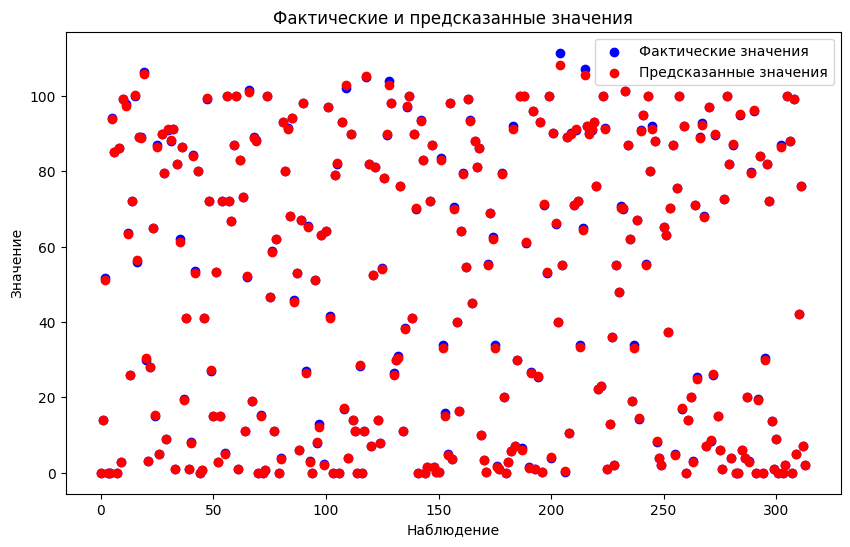

In [15]:
# XGBoost Regressor c подбором параметров
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Определение целевой переменной 
X = df.drop('Act', axis=1)  # Признаки
y = df['Act']  # Целевая переменная
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Определение модели
model = XGBRegressor()

# Определение параметров для подбора
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Использование лучших параметров для обучения модели
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'R²: {r2}')
print(f'MSE: {mse}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()


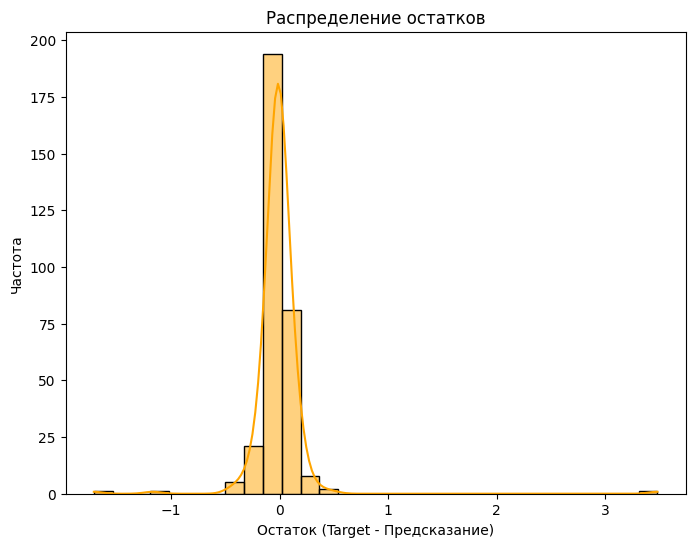

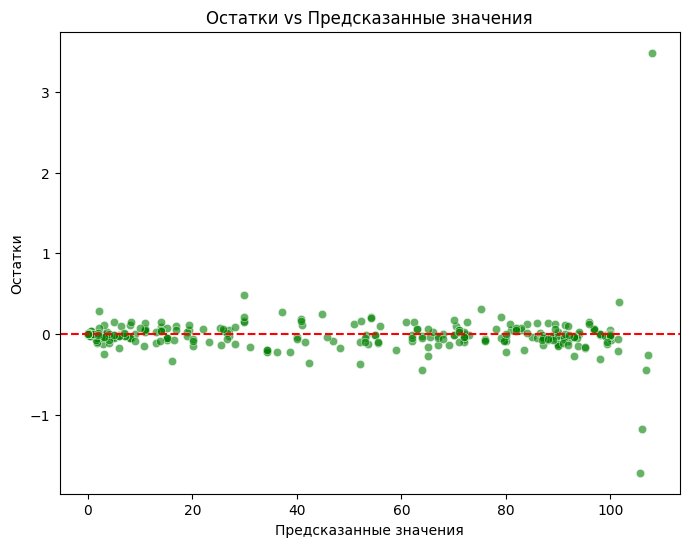

In [21]:
# 13. График остатков
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Распределение остатков')
plt.xlabel('Остаток (Target - Предсказание)')
plt.ylabel('Частота')
plt.show()

# 14. Остатки vs Предсказанные значения
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')
plt.show()


MAE: 0.096429653104992
MSE: 0.06499025510018563
R²: 0.9999538813176608


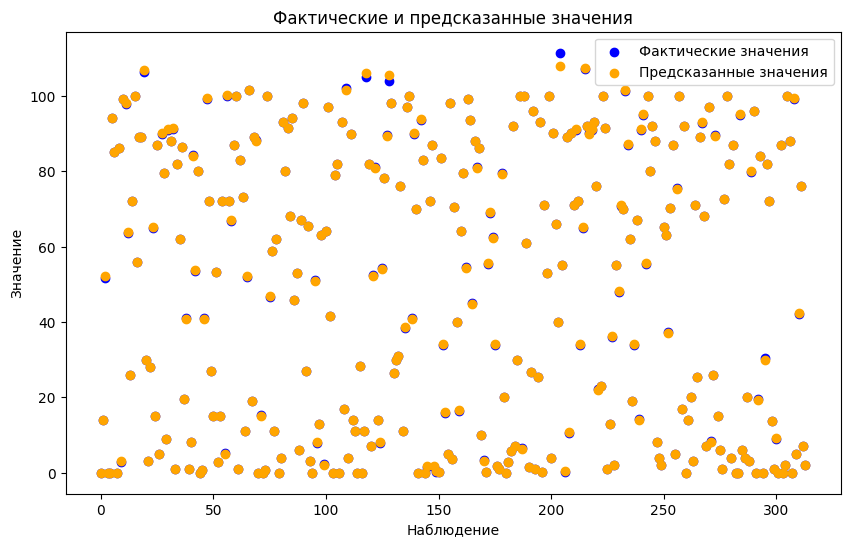

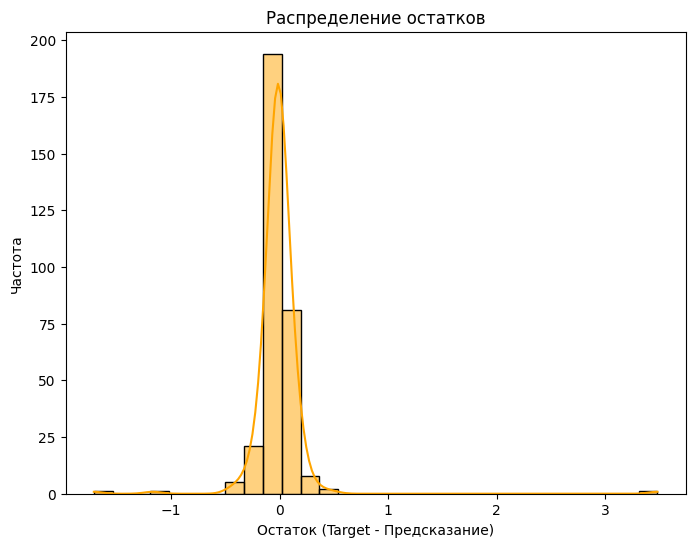

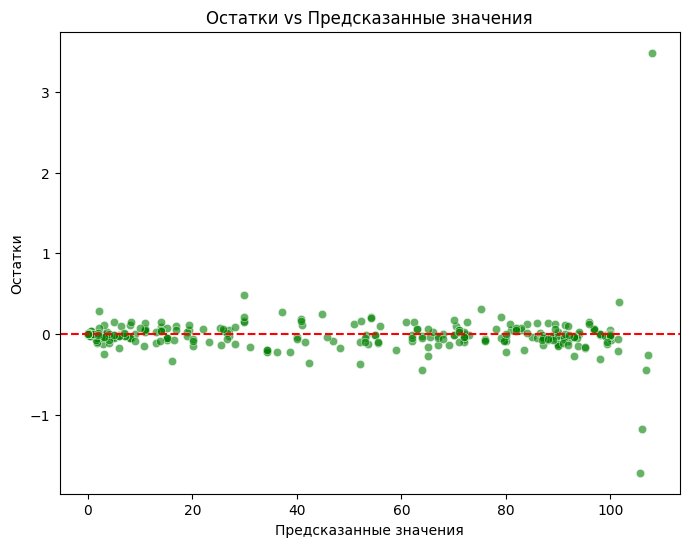

In [23]:
#Random Forest Regressor c подбором параметров
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Определение целевой переменной 
X = df.drop('Act', axis=1)  # Признаки
y = df['Act']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Определение и обучение модели
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = rf.predict(X_test)

# Оценка производительности модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='orange', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

#График остатков
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Распределение остатков')
plt.xlabel('Остаток (Target - Предсказание)')
plt.ylabel('Частота')
plt.show()

#  Остатки vs Предсказанные значения
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11176
[LightGBM] [Info] Number of data points in the train set: 1255, number of used features: 2093
[LightGBM] [Info] Start training from score 45.562713
MAE: 0.17809273457184246
MSE: 0.3221985108185801
R²: 0.9997713600177798


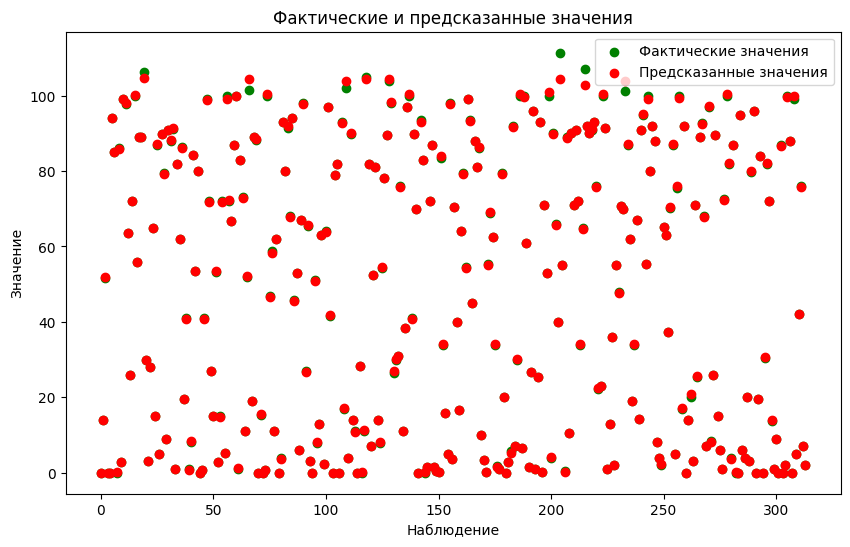

In [29]:
#LGBM без подбора параметров
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Определение целевой переменной 
X = df.drop('Act', axis=1)  # Признаки
y = df['Act']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Создание и обучение модели LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lgbm.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='green', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Mean Absolute Error: 16.3731210025737
Mean Squared Error: 456.5259181746757
R^2 Score: 0.6760379880424678


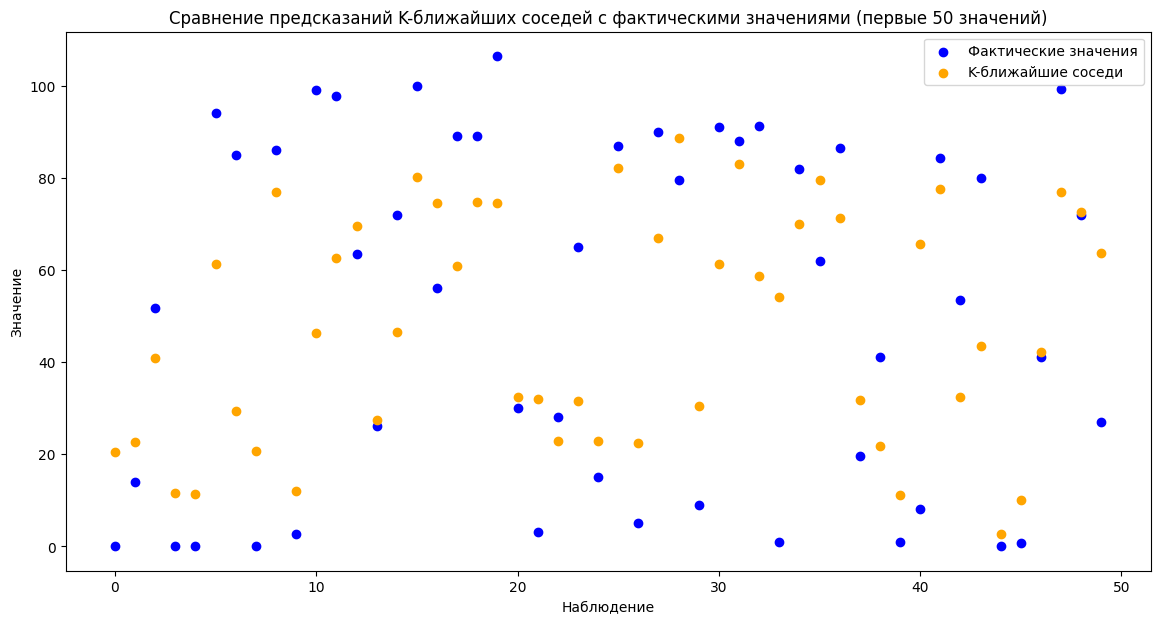

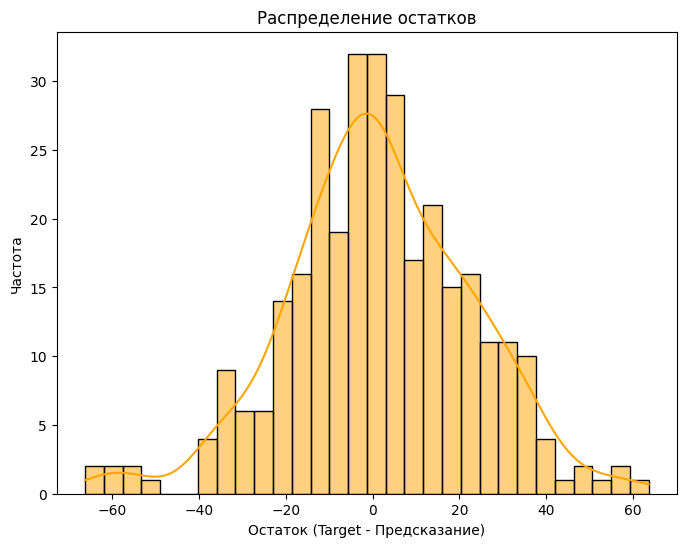

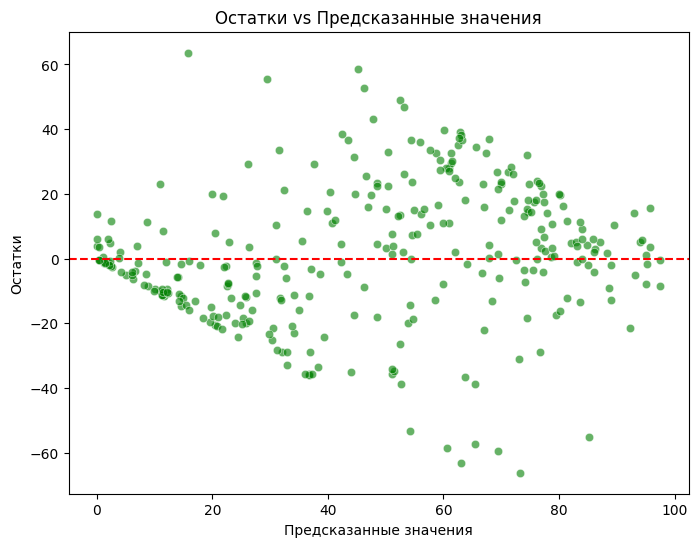

In [16]:
# KNN c подбором параметров

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 


# Определение целевой переменной 
X = df.drop('Act', axis=1)  # Признаки
y = df['Act']  # Целевая переменная

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель K-ближайших соседей
knn = KNeighborsRegressor(n_neighbors=5) 


# Параметры для подбора
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Обучение модели
grid_search.fit(X_train, y_train)

# Получение лучших параметров
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Оценка производительности модели
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Визуализация предсказаний K-ближайших соседей и фактических значений 
plt.figure(figsize=(14, 7))

plt.scatter(range(50), y_test[:50], label='Фактические значения', color='blue')
plt.scatter(range(50), y_pred_knn[:50], label='K-ближайшие соседи', color='orange')

plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Сравнение предсказаний K-ближайших соседей с фактическими значениями (первые 50 значений)')
plt.legend()
plt.show()

#График остатков
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Распределение остатков')
plt.xlabel('Остаток (Target - Предсказание)')
plt.ylabel('Частота')
plt.show()

#  Остатки vs Предсказанные значения
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')
plt.show()

Fitting 3 folds for each of 25 candidates, totalling 75 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.757e+03, tolerance: 1.594e+02
  model = cd_fast.enet_coordinate_descent(


Лучшие параметры: {'alpha': 0.5, 'l1_ratio': 0.1}
Mean Absolute Error: 17.4338646220917
Mean Squared Error: 479.0379982297341
R^2 Score: 0.6600628627371061


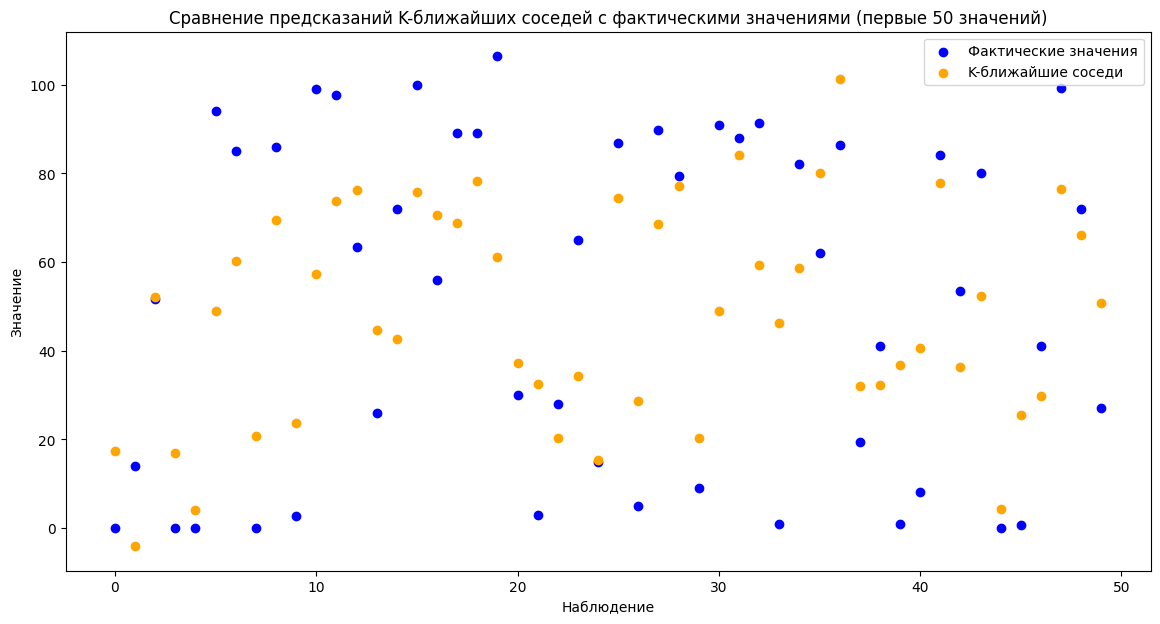

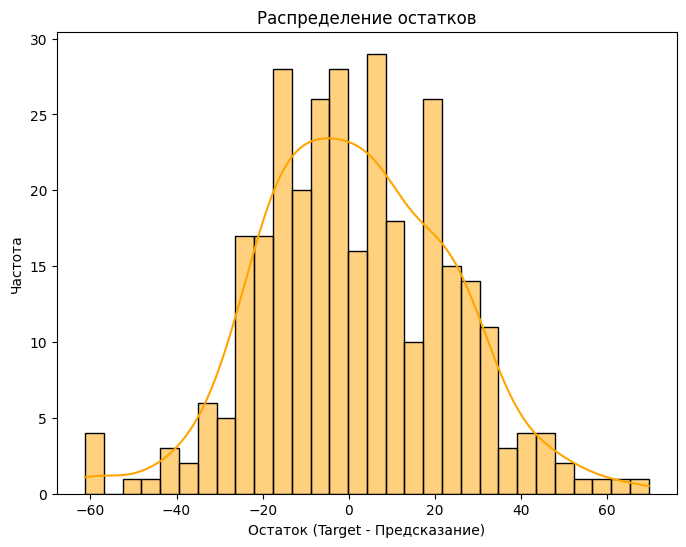

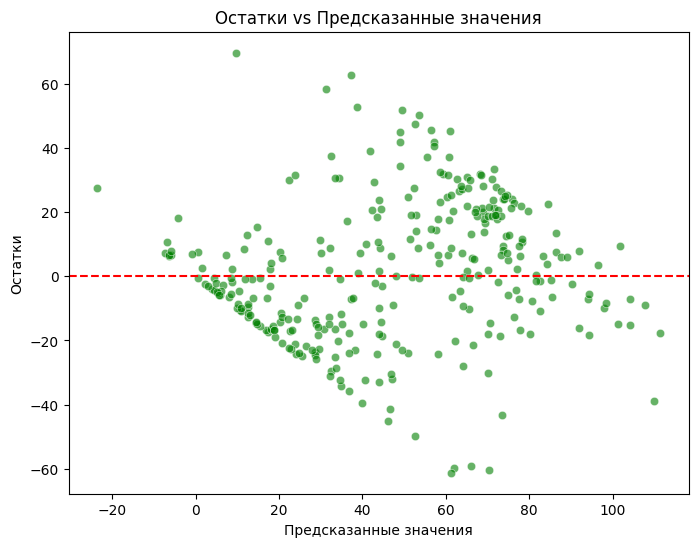

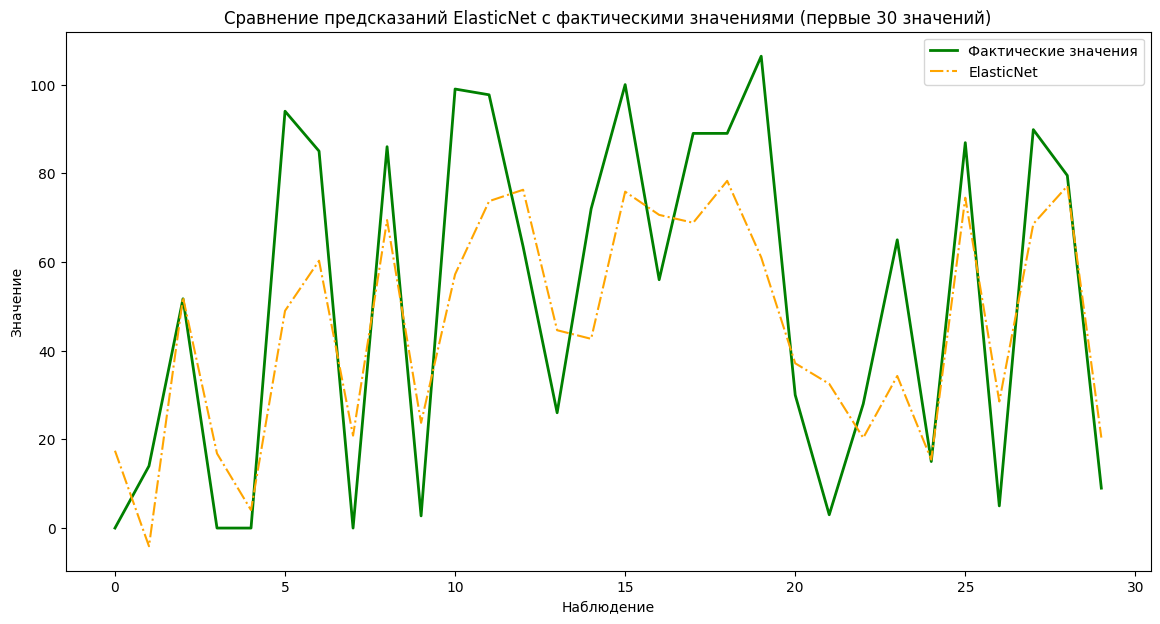

In [13]:
#Elastic Net c подбором параметров
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Определение целевой переменной 
X = df.drop('Act', axis=1)  # Признаки
y = df['Act']  # Целевая переменная

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель ElasticNet
elastic_net = ElasticNet()

# Параметры для подбора
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],  # Регуляризационный параметр
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Соотношение L1/L2
}

# GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Обучение модели
grid_search.fit(X_train, y_train)

# Получение лучших параметров
best_params = grid_search.best_params_
print(f'Лучшие параметры: {best_params}')

# Оценка производительности модели
best_elastic_net = grid_search.best_estimator_
y_pred = best_elastic_net.predict(X_test)

mae= mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Визуализация предсказаний  и фактических значений 
plt.figure(figsize=(14, 7))

plt.scatter(range(50), y_test[:50], label='Фактические значения', color='blue')
plt.scatter(range(50), y_pred[:50], label='K-ближайшие соседи', color='orange')

plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Сравнение предсказаний K-ближайших соседей с фактическими значениями (первые 50 значений)')
plt.legend()
plt.show()

#График остатков
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Распределение остатков')
plt.xlabel('Остаток (Target - Предсказание)')
plt.ylabel('Частота')
plt.show()

#  Остатки и предсказанные значения
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')
plt.show()

# Визуализация предсказаний и фактических значений (первые 30 значений)
plt.figure(figsize=(14, 7))
plt.plot(range(30), y_test.iloc[:30], label='Фактические значения', color='green', linewidth=2)
plt.plot(range(30), y_pred[:30], label='ElasticNet', color='orange', linestyle='-.')

plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Сравнение предсказаний ElasticNet с фактическими значениями (первые 30 значений)')
plt.legend()
plt.show()